In [2]:
# Import Libraries 

import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 
import re
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we create

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Read in the data 

df = pd.read_csv('C:\\Users\\rkiba\\Music\\archive\\Movies.csv')

In [3]:
# Let's see if we have some missing datas 

for col in df.columns :
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

rank - 0.0%
name - 0.0%
year - 0.0%
rating - 0.0%
genre - 0.0%
certificate - 0.0%
run_time - 0.0%
tagline - 0.0%
budget - 0.0%
box_office - 0.0%
casts - 0.0%
directors - 0.0%
writers - 0.0%


In [4]:
# Data Types for our columns (As we can see we cant analyze the budget and the box_office if the values are considered as objects. We need them as integrals)

df.dtypes

rank             int64
name            object
year             int64
rating         float64
genre           object
certificate     object
run_time        object
tagline         object
budget          object
box_office      object
casts           object
directors       object
writers         object
dtype: object

In [5]:
# We remove all non-numeric values in order to have an "int column" (with this code  I transformed the numbers into float64 and I replaced all non-numeric values (e.g., strings, inf values, etc.) with NaN.) 
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

df['box_office'] = pd.to_numeric(df['box_office'], errors='coerce')

In [6]:
# With this code I removed all Nan Values
df = df.dropna(subset=['budget']) 
df = df.dropna(subset=['box_office'])

In [7]:
#And finally I transformed the two columns into int64 

df['budget'] = df['budget'].astype('int64')
df['box_office'] = df['box_office'].astype('int64')
df

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.300,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.200,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.000,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.000,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.000,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,245,The Iron Giant,1999,8.100,"Animation,Action,Adventure",PG,1h 26m,Some secrets are too huge to hide,70000000,23335817,"Eli Marienthal,Harry Connick Jr.,Jennifer Anis...",Brad Bird,"Tim McCanlies,Brad Bird,Ted Hughes"
245,246,The Help,2011,8.100,Drama,PG-13,2h 26m,Change begins with a whisper.,25000000,216639112,"Viola Davis,Emma Stone,Octavia Spencer,Bryce D...",Tate Taylor,"Tate Taylor,Kathryn Stockett"
246,247,Dersu Uzala,1975,8.200,"Adventure,Biography,Drama",G,2h 22m,There is man and beast at nature's mercy. Ther...,4000000,14480,"Maksim Munzuk,Yuriy Solomin,Mikhail Bychkov,Vl...",Akira Kurosawa,"Akira Kurosawa,Yuriy Nagibin,Vladimir Arsenev"
248,249,Gandhi,1982,8.000,"Biography,Drama,History",PG,3h 11m,His Triumph Changed The World Forever.,22000000,52767889,"Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",Richard Attenborough,John Briley


In [8]:
# Filter the movies based on their box_office in ascending order."

df.sort_values(by='box_office', inplace= False, ascending = False)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
77,78,Avengers: Endgame,2019,8.400,"Action,Adventure,Drama",PG-13,3h 1m,Avenge the fallen.,356000000,2799439100,"Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chr...","Anthony Russo,Joe Russo","Christopher Markus,Stephen McFeely,Stan Lee"
62,63,Avengers: Infinity War,2018,8.400,"Action,Adventure,Sci-Fi",PG-13,2h 29m,An entire universe. Once and for all.,321000000,2052415039,"Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...","Anthony Russo,Joe Russo","Christopher Markus,Stephen McFeely,Stan Lee"
149,150,Spider-Man: No Way Home,2021,8.200,"Action,Adventure,Fantasy",PG-13,2h 28m,The Multiverse Unleashed.,200000000,1921847111,"Tom Holland,Zendaya,Benedict Cumberbatch,Jacob...",Jon Watts,"Chris McKenna,Erik Sommers,Stan Lee"
105,106,Top Gun: Maverick,2022,8.300,"Action,Drama",PG-13,2h 10m,Feel the need... The need for speed.,170000000,1488732821,"Tom Cruise,Jennifer Connelly,Miles Teller,Val ...",Joseph Kosinski,"Jim Cash,Jack Epps Jr.,Peter Craig"
180,181,Harry Potter and the Deathly Hallows: Part 2,2011,8.100,"Adventure,Family,Fantasy",PG-13,2h 10m,It All Ends Here,125000000,1342359942,"Daniel Radcliffe,Emma Watson,Rupert Grint,Mich...",David Yates,"Steve Kloves,J.K. Rowling"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,242,It Happened One Night,1934,8.100,"Comedy,Romance",Passed,1h 45m,Two great lovers of the screen in the grandest...,325000,11477,"Clark Gable,Claudette Colbert,Walter Connolly,...",Frank Capra,"Robert Riskin,Samuel Hopkins Adams"
63,64,Witness for the Prosecution,1957,8.400,"Crime,Drama,Mystery",Approved,1h 56m,The most electrifying entertainment of our time!,3000000,7693,"Tyrone Power,Marlene Dietrich,Charles Laughton...",Billy Wilder,"Agatha Christie,Billy Wilder,Harry Kurnitz"
59,60,Paths of Glory,1957,8.400,"Drama,War",Approved,1h 28m,Never has the screen thrust so deeply into the...,935000,5252,"Kirk Douglas,Ralph Meeker,Adolphe Menjou,Georg...",Stanley Kubrick,"Stanley Kubrick,Calder Willingham,Jim Thompson"
4,5,12 Angry Men,1957,9.000,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [9]:
# Filter the movies based on their budget in ascending order."
df.sort_values(by='budget', inplace = False, ascending = False)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
78,79,Princess Mononoke,1997,8.400,"Animation,Action,Adventure",PG-13,2h 14m,Live on.,2400000000,170005875,"Yôji Matsuda,Yuriko Ishida,Yûko Tanaka,Billy C...",Hayao Miyazaki,"Hayao Miyazaki,Neil Gaiman"
82,83,3 Idiots,2009,8.400,"Comedy,Drama",PG-13,2h 50m,Don't be Stupid. Be an I.D.I.O.T.,550000000,60262836,"Aamir Khan,Madhavan,Mona Singh,Sharman Joshi,K...",Rajkumar Hirani,"Rajkumar Hirani,Abhijat Joshi,Vidhu Vinod Chopra"
77,78,Avengers: Endgame,2019,8.400,"Action,Adventure,Drama",PG-13,3h 1m,Avenge the fallen.,356000000,2799439100,"Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chr...","Anthony Russo,Joe Russo","Christopher Markus,Stephen McFeely,Stan Lee"
62,63,Avengers: Infinity War,2018,8.400,"Action,Adventure,Sci-Fi",PG-13,2h 29m,An entire universe. Once and for all.,321000000,2052415039,"Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...","Anthony Russo,Joe Russo","Christopher Markus,Stephen McFeely,Stan Lee"
68,69,The Dark Knight Rises,2012,8.400,"Action,Drama",PG-13,2h 44m,The Legend Ends,250000000,1081169825,"Christian Bale,Tom Hardy,Anne Hathaway,Gary Ol...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,The Kid,1921,8.300,"Comedy,Drama,Family",Passed,1h 8m,This is the great film he has been working on ...,250000,41960,"Charles Chaplin,Edna Purviance,Jackie Coogan,C...",Charles Chaplin,Charles Chaplin
151,152,Rashomon,1950,8.200,"Crime,Drama,Mystery",Not Rated,1h 28m,"The husband, the wife...or the bandit?",250000,81379,"Toshirô Mifune,Machiko Kyô,Masayuki Mori,Takas...",Akira Kurosawa,"Ryûnosuke Akutagawa,Akira Kurosawa,Shinobu Has..."
146,147,Monty Python and the Holy Grail,1975,8.200,"Adventure,Comedy,Fantasy",PG,1h 31m,You can do worse than see it.,229575,1940906,"Graham Chapman,John Cleese,Eric Idle,Terry Gil...","Terry Gilliam,Terry Jones","Graham Chapman,John Cleese,Eric Idle"
198,199,The Seventh Seal,1957,8.100,"Drama,Fantasy",Not Rated,1h 36m,"A film of visual scope, of imaginative concept...",150000,311212,"Max von Sydow,Gunnar Björnstrand,Bengt Ekerot,...",Ingmar Bergman,Ingmar Bergman


In [10]:
# Changing Visualtion Format for better understanding
pd.set_option("display.max_rows",None)

In [11]:
# As we can see we have a false budget value, the creator of this dataset did not convert the yen or rupees into USD. 
# We need to convert the values 

df.at[78, 'budget'] = df.at[78, 'budget'] =  2350000000 * 0.0071 # For "the Princess Mononoké" budget in Yen
df.at[83, 'budget'] = df.at[83, 'budget'] =  550000000 * 0.012 # For the budget of "3 Idiots" in Rupees


df.sort_values(by='budget', inplace = False, ascending = False)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
82,83,3 Idiots,2009,8.400,"Comedy,Drama",PG-13,2h 50m,Don't be Stupid. Be an I.D.I.O.T.,550000000.000,60262836,"Aamir Khan,Madhavan,Mona Singh,Sharman Joshi,K...",Rajkumar Hirani,"Rajkumar Hirani,Abhijat Joshi,Vidhu Vinod Chopra"
77,78,Avengers: Endgame,2019,8.400,"Action,Adventure,Drama",PG-13,3h 1m,Avenge the fallen.,356000000.000,2799439100,"Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chr...","Anthony Russo,Joe Russo","Christopher Markus,Stephen McFeely,Stan Lee"
62,63,Avengers: Infinity War,2018,8.400,"Action,Adventure,Sci-Fi",PG-13,2h 29m,An entire universe. Once and for all.,321000000.000,2052415039,"Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...","Anthony Russo,Joe Russo","Christopher Markus,Stephen McFeely,Stan Lee"
68,69,The Dark Knight Rises,2012,8.400,"Action,Drama",PG-13,2h 44m,The Legend Ends,250000000.000,1081169825,"Christian Bale,Tom Hardy,Anne Hathaway,Gary Ol...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
85,86,Toy Story 3,2010,8.300,"Animation,Adventure,Comedy",G,1h 43m,The Breakout Comedy Of The Summer,200000000.000,1067316101,"Tom Hanks,Tim Allen,Joan Cusack,Ned Beatty,Don...",Lee Unkrich,"John Lasseter,Andrew Stanton,Lee Unkrich"
149,150,Spider-Man: No Way Home,2021,8.200,"Action,Adventure,Fantasy",PG-13,2h 28m,The Multiverse Unleashed.,200000000.000,1921847111,"Tom Holland,Zendaya,Benedict Cumberbatch,Jacob...",Jon Watts,"Chris McKenna,Erik Sommers,Stan Lee"
2,3,The Dark Knight,2008,9.000,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000.000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
56,57,WALL·E,2008,8.400,"Animation,Adventure,Family",G,1h 38m,After 700 years of doing what he was built for...,180000000.000,521311890,"Ben Burtt,Elissa Knight,Jeff Garlin,Fred Willa...",Andrew Stanton,"Andrew Stanton,Pete Docter,Jim Reardon"
72,73,Coco,2017,8.400,"Animation,Adventure,Comedy",PG,1h 45m,The celebration of a lifetime,175000000.000,814337054,"Anthony Gonzalez,Gael García Bernal,Benjamin B...","Lee Unkrich,Adrian Molina(co-directed by)","Lee Unkrich,Jason Katz,Matthew Aldrich"
160,161,Inside Out,2015,8.200,"Animation,Adventure,Comedy",PG,1h 35m,Meet the little voices inside your head.,175000000.000,858848019,"Amy Poehler,Bill Hader,Lewis Black,Mindy Kalin...","Pete Docter,Ronnie Del Carmen(co-director)","Pete Docter,Ronnie Del Carmen,Meg LeFauve"


In [12]:
# Drop any duplicates

df["name"]  = df["name"].drop_duplicates()
df["name"].drop_duplicates().sort_values(ascending = True)

4                                           12 Angry Men
178                                     12 Years a Slave
122                                                 1917
90                                 2001: A Space Odyssey
82                                              3 Idiots
142                                     A Beautiful Mind
102                                   A Clockwork Orange
113                                         A Separation
50                                                 Alien
64                                                Aliens
130                                        All About Eve
71                                               Amadeus
66                                       American Beauty
37                                    American History X
235                                        Amores Perros
100                                               Amélie
52                                        Apocalypse Now
77                             

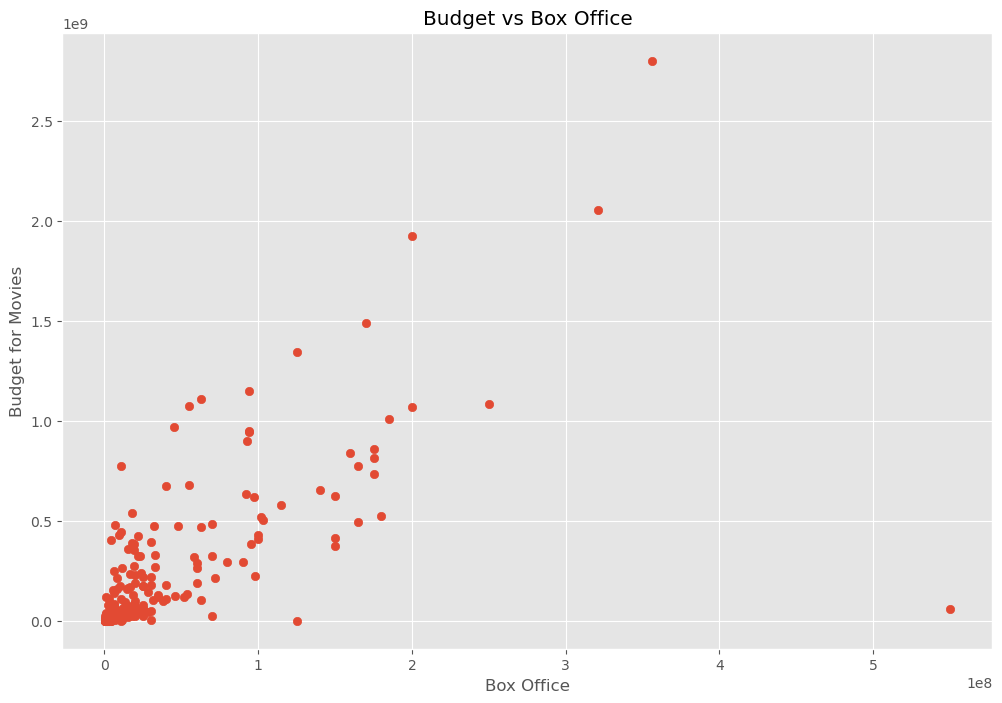

In [13]:
# Budget High Correlation by building a Scatter Plot with budget vs box_office

plt.scatter(x = df["budget"], y = df["box_office"])

plt.title("Budget vs Box Office")

plt.xlabel("Box Office")

plt.ylabel("Budget for Movies")

plt.show()

In [14]:
df.sort_values(by='budget', inplace = False, ascending = False)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
82,83,3 Idiots,2009,8.400,"Comedy,Drama",PG-13,2h 50m,Don't be Stupid. Be an I.D.I.O.T.,550000000.000,60262836,"Aamir Khan,Madhavan,Mona Singh,Sharman Joshi,K...",Rajkumar Hirani,"Rajkumar Hirani,Abhijat Joshi,Vidhu Vinod Chopra"
77,78,Avengers: Endgame,2019,8.400,"Action,Adventure,Drama",PG-13,3h 1m,Avenge the fallen.,356000000.000,2799439100,"Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chr...","Anthony Russo,Joe Russo","Christopher Markus,Stephen McFeely,Stan Lee"
62,63,Avengers: Infinity War,2018,8.400,"Action,Adventure,Sci-Fi",PG-13,2h 29m,An entire universe. Once and for all.,321000000.000,2052415039,"Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...","Anthony Russo,Joe Russo","Christopher Markus,Stephen McFeely,Stan Lee"
68,69,The Dark Knight Rises,2012,8.400,"Action,Drama",PG-13,2h 44m,The Legend Ends,250000000.000,1081169825,"Christian Bale,Tom Hardy,Anne Hathaway,Gary Ol...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
85,86,Toy Story 3,2010,8.300,"Animation,Adventure,Comedy",G,1h 43m,The Breakout Comedy Of The Summer,200000000.000,1067316101,"Tom Hanks,Tim Allen,Joan Cusack,Ned Beatty,Don...",Lee Unkrich,"John Lasseter,Andrew Stanton,Lee Unkrich"
149,150,Spider-Man: No Way Home,2021,8.200,"Action,Adventure,Fantasy",PG-13,2h 28m,The Multiverse Unleashed.,200000000.000,1921847111,"Tom Holland,Zendaya,Benedict Cumberbatch,Jacob...",Jon Watts,"Chris McKenna,Erik Sommers,Stan Lee"
2,3,The Dark Knight,2008,9.000,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000.000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
56,57,WALL·E,2008,8.400,"Animation,Adventure,Family",G,1h 38m,After 700 years of doing what he was built for...,180000000.000,521311890,"Ben Burtt,Elissa Knight,Jeff Garlin,Fred Willa...",Andrew Stanton,"Andrew Stanton,Pete Docter,Jim Reardon"
72,73,Coco,2017,8.400,"Animation,Adventure,Comedy",PG,1h 45m,The celebration of a lifetime,175000000.000,814337054,"Anthony Gonzalez,Gael García Bernal,Benjamin B...","Lee Unkrich,Adrian Molina(co-directed by)","Lee Unkrich,Jason Katz,Matthew Aldrich"
160,161,Inside Out,2015,8.200,"Animation,Adventure,Comedy",PG,1h 35m,Meet the little voices inside your head.,175000000.000,858848019,"Amy Poehler,Bill Hader,Lewis Black,Mindy Kalin...","Pete Docter,Ronnie Del Carmen(co-director)","Pete Docter,Ronnie Del Carmen,Meg LeFauve"


<Axes: xlabel='budget', ylabel='box_office'>

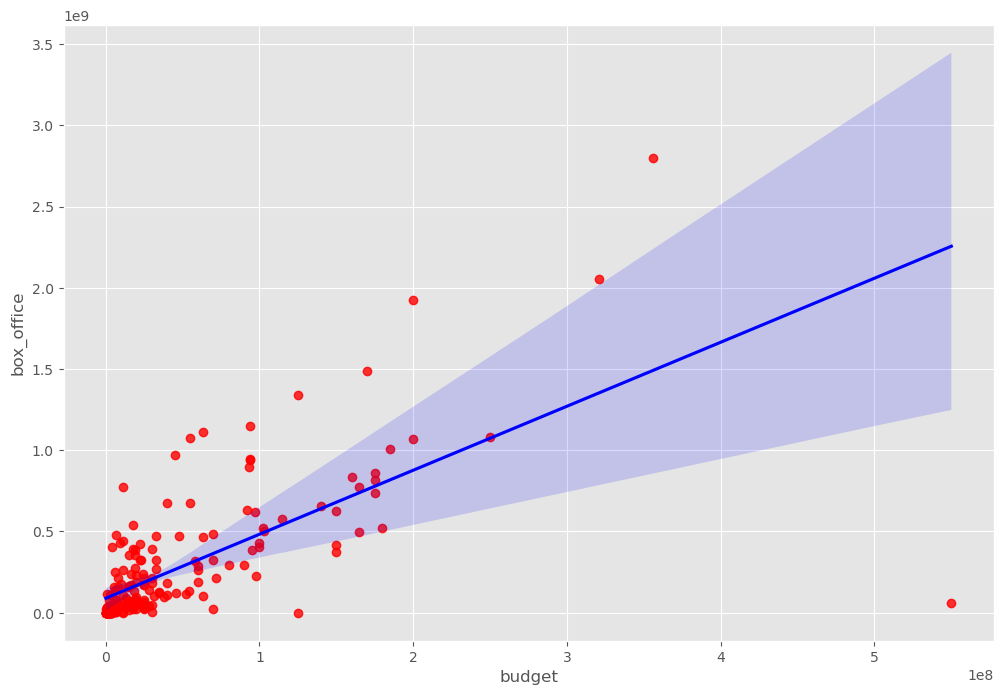

In [15]:
# Plot Budget vs Gross using seaborn

sns.regplot(x = "budget", y="box_office", data = df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

In [16]:
# Let's start looking for the correlation pearson,kendall,spearman

df[["budget","box_office","year",'rating']].corr(method = "pearson" )


,budget,box_office,year,rating
budget,1.000,0.690,0.467,0.092
box_office,0.690,1.000,0.454,0.157
year,0.467,0.454,1.000,-0.013
rating,0.092,0.157,-0.013,1.000


In [17]:
# We can see there is a high corellation between budgets and the box_offices

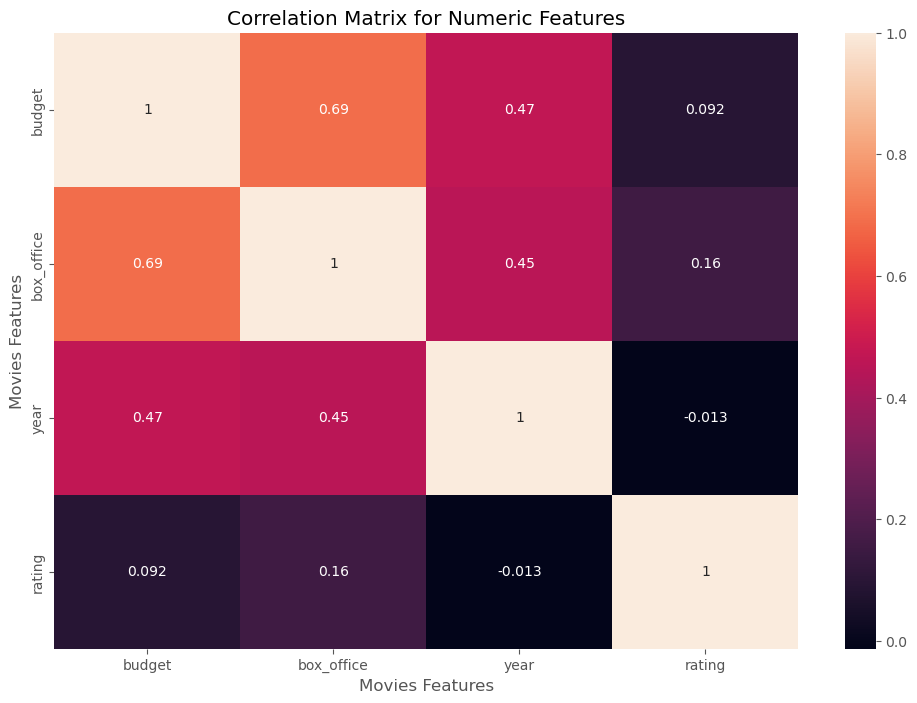

In [18]:
correlation_matrix = df[["budget","box_office","year",'rating']].corr(method = "pearson" )

sns. heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")
 
plt.xlabel("Movies Features")

plt.ylabel("Movies Features")

plt.show()

In [19]:
# In order to have a deep analysis in all the data that the dataframe provide us we need to numerize the text data
# into numbers and try to find some correlation between the data
df_numerized = df 

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,175,1994,9.300,61,9,47,53,25000000.000,28884504,179,31,172
1,2,153,1972,9.200,54,9,73,31,6000000.000,250341816,135,29,118
2,3,146,2008,9.000,7,7,57,188,185000000.000,1006234167,39,14,100
3,4,154,1974,9.000,54,9,86,24,13000000.000,47961919,3,29,54
4,5,0,1957,9.000,54,2,10,96,350000.000,955,83,104,148
5,6,124,1993,9.000,39,9,83,187,22000000.000,322161245,126,109,181
6,7,169,2003,9.000,1,7,85,155,94000000.000,1146457748,61,85,80
7,8,110,1994,8.900,54,9,59,62,8000000.000,213928762,108,87,144
8,9,168,2001,8.800,1,7,74,147,93000000.000,898204420,59,85,80
9,10,156,1966,8.800,28,2,74,175,1200000.000,25253887,46,103,115


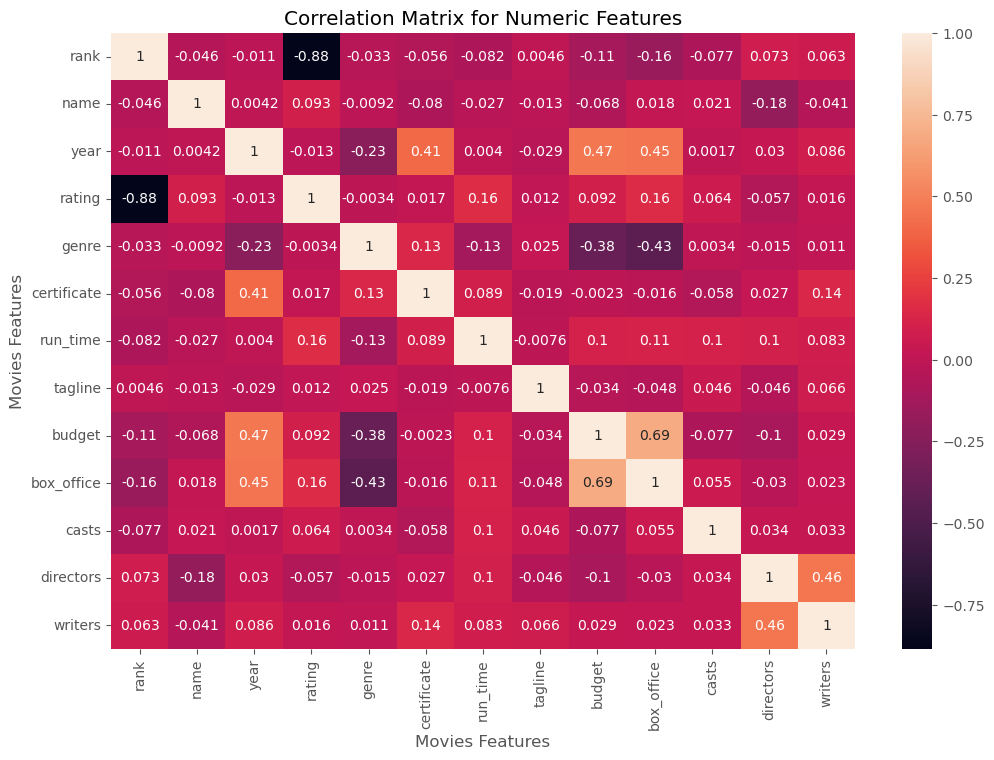

In [20]:
# As we can see in the heatmap we have more data to correlate. Some data are more suceptible to be correlated than others.

correlation_matrix = df_numerized.corr(method = "pearson" )

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Numeric Features")
 
plt.xlabel("Movies Features")

plt.ylabel("Movies Features")

plt.show()

In [23]:
#To better understand the correlation we sort the values 

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

rank         rank           1.000
             name          -0.046
             year          -0.011
             rating        -0.885
             genre         -0.033
             certificate   -0.056
             run_time      -0.082
             tagline        0.005
             budget        -0.110
             box_office    -0.156
             casts         -0.077
             directors      0.073
             writers        0.063
name         rank          -0.046
             name           1.000
             year           0.004
             rating         0.093
             genre         -0.009
             certificate   -0.080
             run_time      -0.027
             tagline       -0.013
             budget        -0.068
             box_office     0.018
             casts          0.021
             directors     -0.184
             writers       -0.041
year         rank          -0.011
             name           0.004
             year           1.000
             r

In [25]:
#In order to us ethe data with the most high correlation we need to sort the values 

corr_pairs_sorted = corr_pairs.sort_values()

corr_pairs_sorted

rating       rank          -0.885
rank         rating        -0.885
box_office   genre         -0.435
genre        box_office    -0.435
budget       genre         -0.382
genre        budget        -0.382
             year          -0.234
year         genre         -0.234
directors    name          -0.184
name         directors     -0.184
box_office   rank          -0.156
rank         box_office    -0.156
genre        run_time      -0.126
run_time     genre         -0.126
budget       rank          -0.110
rank         budget        -0.110
directors    budget        -0.103
budget       directors     -0.103
run_time     rank          -0.082
rank         run_time      -0.082
name         certificate   -0.080
certificate  name          -0.080
rank         casts         -0.077
casts        rank          -0.077
budget       casts         -0.077
casts        budget        -0.077
budget       name          -0.068
name         budget        -0.068
casts        certificate   -0.058
certificate  c

In [28]:
high_corr = corr_pairs_sorted[corr_pairs_sorted > 0.4]
high_corr

year         certificate   0.405
certificate  year          0.405
box_office   year          0.454
year         box_office    0.454
directors    writers       0.462
writers      directors     0.462
budget       year          0.467
year         budget        0.467
budget       box_office    0.690
box_office   budget        0.690
rank         rank          1.000
run_time     run_time      1.000
casts        casts         1.000
box_office   box_office    1.000
budget       budget        1.000
tagline      tagline       1.000
certificate  certificate   1.000
genre        genre         1.000
rating       rating        1.000
year         year          1.000
name         name          1.000
directors    directors     1.000
writers      writers       1.000
dtype: float64

In [ ]:
# As we can see in the dataframe, the analysis will be easier once we detect the high correlated data